In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import descartes
from shapely import wkt
from shapely.geometry import Point, Polygon

import warnings
warnings.filterwarnings("ignore")

In [2]:
res_union_df = pd.read_csv('map_files/res_union.csv')

In [3]:
res_union_df['geometry'] = res_union_df['geometry'].apply(wkt.loads)
res_union = gpd.GeoDataFrame(res_union_df,geometry='geometry')

In [10]:
year = 2017
df = pd.read_csv('data/df_%d_OMB_Census_in_progress.csv' % year)

In [11]:
df.columns

Index(['Company', 'Address Line 1', 'City', 'State', 'ZipCode', 'County Code',
       'Primary NAICS Code', 'Census Tract', 'Census Block', 'Latitude',
       'Longitude', 'CBSA Code', 'CBSA Level', 'CSA Code', 'FIPS Code',
       'State FIPS', 'NAICS2', 'NAICS2 desc', 'UA', 'NAICS6', 'NAICS6 desc'],
      dtype='object')

In [6]:
%%time
to_omit = ['AS','GU','MP','PR','VI','HI','AK']
recs = []

for i,v in df.iterrows():
    if v['State'] not in to_omit:
        recs.append(df.loc[i].values)

CPU times: user 1h 28min 55s, sys: 2min 17s, total: 1h 31min 12s
Wall time: 1h 34min 15s


In [13]:
%%time
df = pd.DataFrame(recs,columns=['Company', 'Address Line 1', 'City', 'State', 'ZipCode', 'County Code',
       'Primary NAICS Code', 'Census Tract', 'Census Block', 'Latitude',
       'Longitude', 'CBSA Code', 'CBSA Level', 'CSA Code', 'FIPS Code',
       'State FIPS', 'NAICS2', 'NAICS2 desc', 'UA', 'NAICS6', 'NAICS6 desc'])
geometry = [Point(xy) for xy in zip(df["Longitude"],df["Latitude"])]

geo_df = gpd.GeoDataFrame(df,crs={'init' :'epsg:4326'},geometry=geometry)

CPU times: user 4min 32s, sys: 6min, total: 10min 32s
Wall time: 14min 36s


In [14]:
geo_df_11 = geo_df[geo_df['NAICS2']==11]

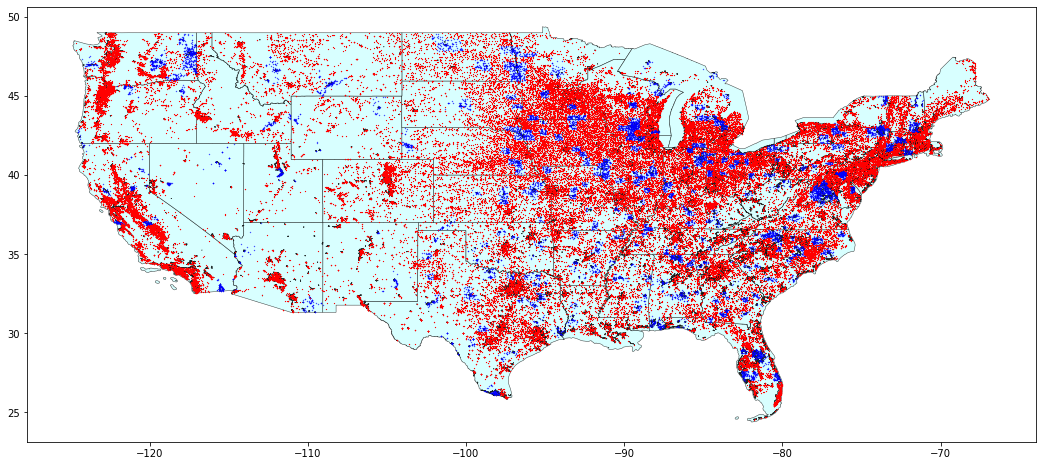

In [23]:
# 14+ million data points from InfoGroup businesses colored to indicate if the business is in a Census Urban Area
# or not. The basemap includes boundaries of urban areas but they are so small in area that they are entirely 
# covered over by the symbols.
#
# I didn't display the labels (i.e., key) correctly but red dots locate businesses in a Census UA and blue dots
# indicate businesses outside a Census UA.
fig,ax = plt.subplots(figsize=(21,8))
res_union.plot(ax=ax,alpha=0.75,color='#ccffff',lw=0.5,edgecolor='black') 
#res_union.plot(ax=ax,alpha=0.4,color="gray")
geo_df_11[geo_df_11['UA']==99999.0].plot(ax=ax,markersize=0.1,color='blue',marker='o',label='Not Urban') 
geo_df_11[geo_df_11['UA']!=99999.0].plot(ax=ax,markersize=0.1,color='red',marker='^',label='Urban') 